In [6]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)


60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

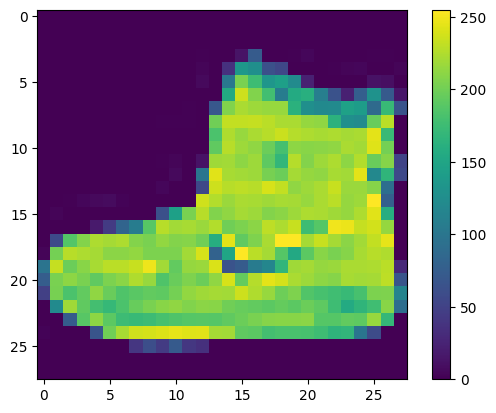

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

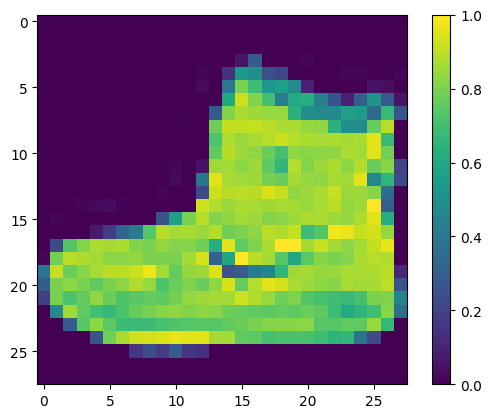

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

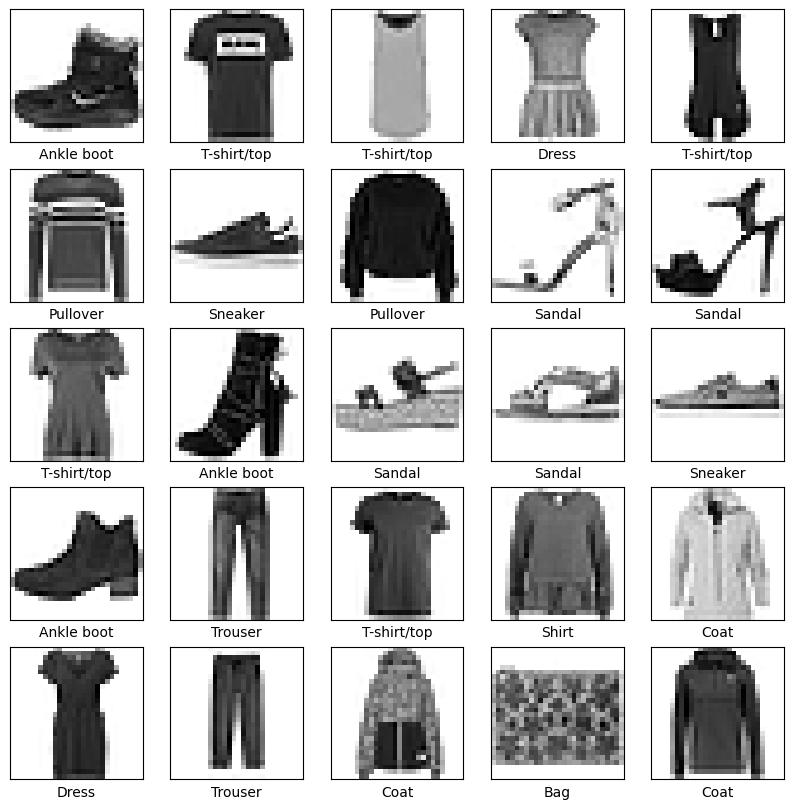

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [18]:
history = model.fit(
train_images,
train_labels,
epochs=10,
batch_size=32,
validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4955 - accuracy: 0.8267 - val_loss: 0.4308 - val_accuracy: 0.8430
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3714 - accuracy: 0.8664 - val_loss: 0.3894 - val_accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3331 - accuracy: 0.8795 - val_loss: 0.3724 - val_accuracy: 0.8660
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3099 - accuracy: 0.8865 - val_loss: 0.3621 - val_accuracy: 0.8704
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2914 - accuracy: 0.8941 - val_loss: 0.3458 - val_accuracy: 0.8770
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2809 - accuracy: 0.8960 - val_loss: 0.3362 - val_accuracy: 0.8796
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2671 - accuracy: 0.9011 - val_loss: 0.3358 - val_ac

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3504 - accuracy: 0.8767 - 1s/epoch - 4ms/step

Test accuracy: 0.8766999840736389


In [20]:
probability_model = tf.keras.Sequential([model,
tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [22]:
predictions[0]

array([3.4260648e-07, 1.5807462e-08, 2.5595259e-10, 1.1855936e-09,
       1.1558491e-10, 2.3728186e-04, 1.5035495e-09, 2.3027727e-02,
       7.5006362e-08, 9.7673452e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

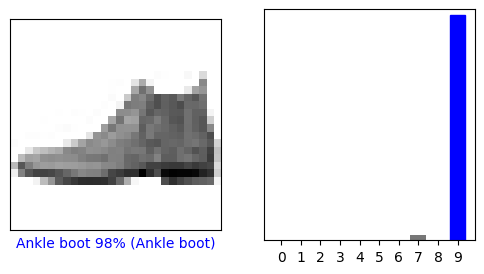

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

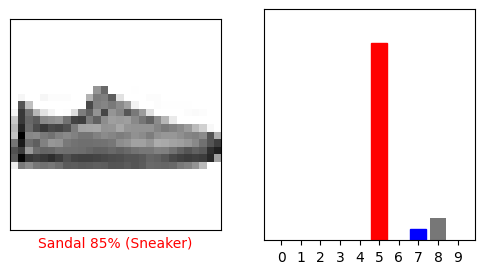

[4.5507729e-08 4.8028078e-06 6.2985940e-08 5.6451972e-07 3.6485133e-07
 8.5209388e-01 4.8906029e-10 4.9681067e-02 9.8218612e-02 5.0857312e-07]


In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()
print(predictions[i])

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 62ms/step
[[3.42607478e-07 1.58075242e-08 2.55953564e-10 1.18559129e-09
  1.15585125e-10 2.37282526e-04 1.50355528e-09 2.30277646e-02
  7.50063620e-08 9.76734519e-01]]


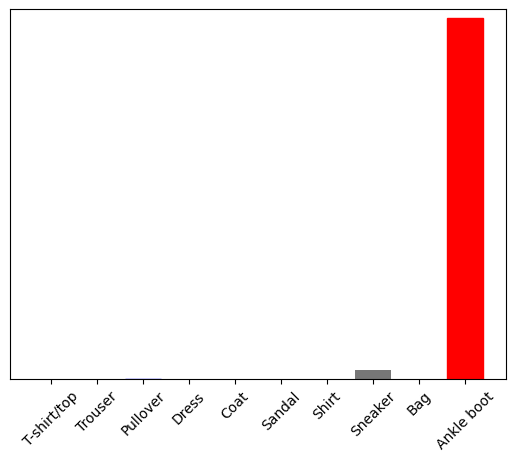

In [33]:
img = test_images[0]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()